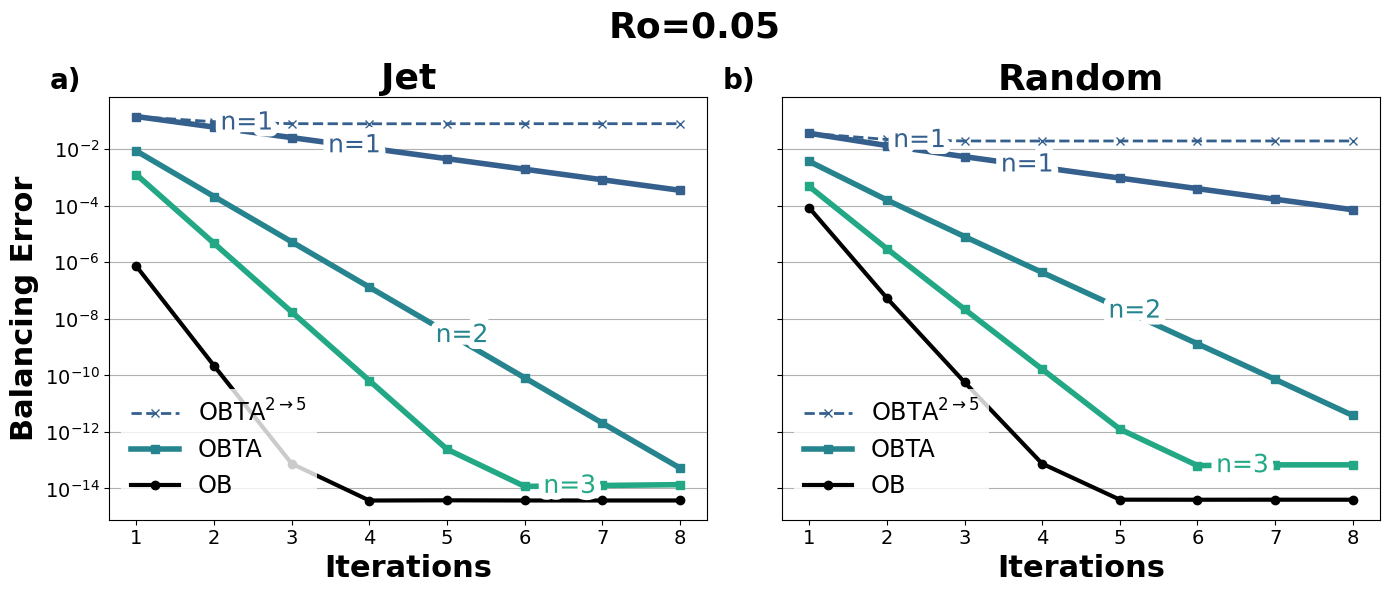

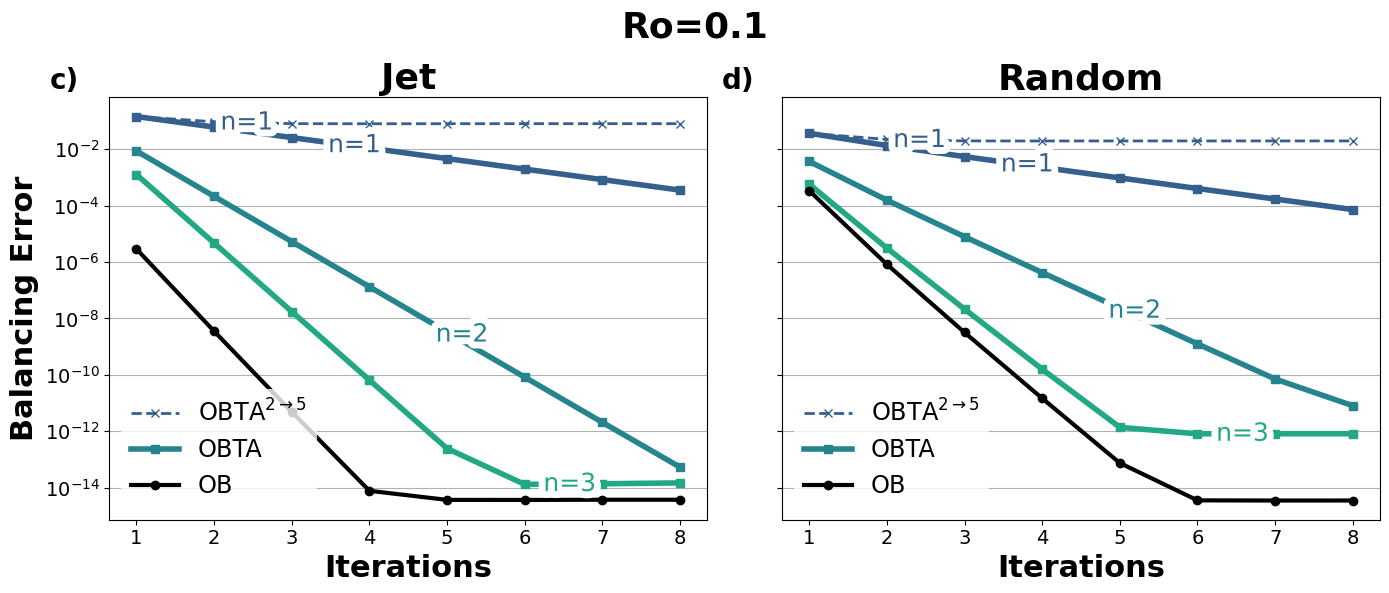

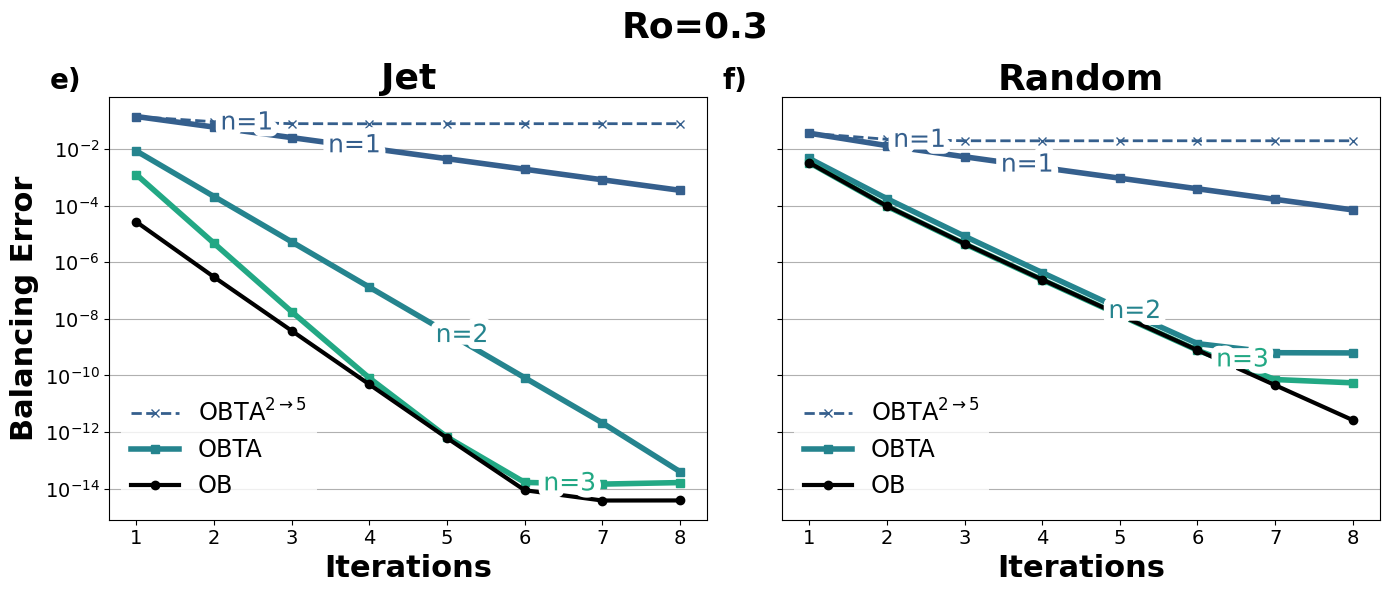

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from labellines import labelLines
from matplotlib.lines import Line2D

ds = xr.load_dataset("../data/ob_vs_obta.nc", decode_timedelta=False)

colors = plt.cm.viridis_r(np.linspace(0.4, 0.7, len(ds.number_chunks)))[::-1]
labels = iter(["a)", "b)", "c)", "d)", "e)", "f)"])

for ro in ds.rossby_number:
    fig, axs = plt.subplots(1, 2, figsize=(14,6), tight_layout=True, sharey=True)

    for ax, ic in zip(axs, ds.initial_condition):
        # OBTA without base point recalculation
        ds.sel({"rossby_number": ro,
                "initial_condition": ic,
                "number_chunks":1,
                "balancing_method": "obta2_5"}).deviation.plot(
                    ax=ax, marker="x", color=colors[0], lw=2, label="n=1",
                    linestyle="--",
                )

        # OBTA with base point recalculation
        for n_chunks, color in zip(ds.number_chunks, colors):
            ds.sel({"rossby_number": ro,
                    "initial_condition": ic,
                    "number_chunks": n_chunks,
                    "balancing_method": "obta"}).deviation.plot(
                        ax=ax, marker="s", color=color, lw=4, label=f"n={int(n_chunks)}",
                    )

        # Create inline labels
        labelLines(ax.get_lines(), zorder=2.5, align=False,
                fontsize=18, outline_width=10)

        # OB
        ds.sel({"rossby_number": ro,
                "initial_condition": ic,
                "number_chunks":1,
                "balancing_method": "ob"}).deviation.plot(
                    ax=ax, marker="o", color="black", lw=3,
                )

        # create a custom legend
        custom_lines = [Line2D([0], [0], color=colors[0], lw=2, linestyle="--", marker="x"),
                        Line2D([0], [0], color=colors[1], lw=4, marker="s"),
                        Line2D([0], [0], color="black", lw=3, marker="o")]
        leg = ax.legend(custom_lines,
                        [r"OBTA$^{2\rightarrow5}$", "OBTA", "OB"],
                        loc="lower left",
                        frameon=True,
                        prop={"size":"xx-large"})
        leg.get_frame().set_linewidth(0)
        leg.get_frame().set_facecolor("white")

        ax.tick_params(labelsize=14)
        ax.set_yscale("log")
        ax.grid(axis="y")
        ax.set_title(ic.item().capitalize(), fontsize=26, fontweight="bold")
        ax.set_xlabel("Iterations", fontsize=22, fontweight="bold")
        ax.set_ylabel("")

        # Create a, b labels
        ax.text(-0.1, 1.02, next(labels), transform=ax.transAxes,
                fontsize=20, fontweight="bold")

    axs[0].set_ylabel("Balancing Error", fontsize=22, fontweight="bold")

    plt.suptitle(f"Ro={ro:.2g}", fontsize=26, fontweight="bold")

    plt.savefig(f"../figures/ob_vs_obta_ro{ro:.2g}.png", dpi=200)